In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import glob
import matplotlib.gridspec as gridspec
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap


In [3]:
def read_data_roms(file_in):
        with Dataset(file_in, 'r') as nc:
                ssh = nc.variables['zeta'][0,:,:]
                lat = nc.variables['lat_rho'][:]
                lon = nc.variables['lon_rho'][:]

        return ssh, lat, lon

In [4]:
directory = '/Users/laura/Documents/scripts/IMEDEA/data/'

In [5]:
m = sio.loadmat(directory + 'KE_EKE_WMOP_HINDCAST_MFS_v11_average_2009_2015.mat')
EKE_geostr_hindcast = m['EKE_geostr_hindcast']

In [6]:
_, lat_wmop, lon_wmop = read_data_roms(directory + 'WMOP/roms_WMOP_HINDCAST_simplified_avg_20090123.nc')

In [7]:
lon_r2 = kron(ones((len(lat_wmop),1)),lon_wmop)
lat_r2 = kron(ones((len(lon_wmop),1)),lat_wmop)#,np.transpose(lat))
lat_r2 = np.transpose(lat_r2)

In [8]:
box_plot = [-6., 9., 35., 45.]

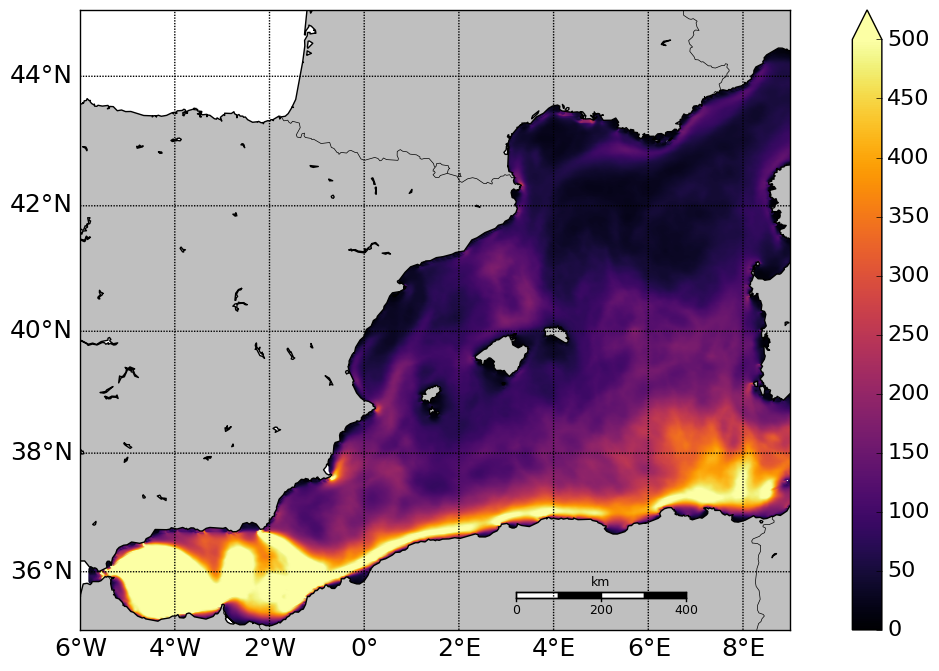

In [9]:
lomin = box_plot[0]
lomax = box_plot[1]
lamin = box_plot[2]
lamax = box_plot[3]

vmin = 0.
vmax = 500.

plt.figure(figsize=(16, 8))
my_map = Basemap(projection='merc'
                  , lat_0=(lamin+lamax)/2
                  , lon_0=(lomin+lomax)/2
                  , resolution = 'i'
                  , llcrnrlon = lomin, llcrnrlat= lamin
                  , urcrnrlon = lomax
                  , urcrnrlat = lamax
                  , area_thresh = 10)

x, y = my_map(lon_r2, lat_r2) # compute map proj coordinates.

c1 = my_map.scatter(x, y, s=10, c=EKE_geostr_hindcast, linewidth=0, vmin=vmin
                         , vmax=vmax, cmap = 'inferno')
c1.set_clim([vmin, vmax])

my_map.drawcoastlines()
my_map.drawcountries(linewidth=0.5)
my_map.fillcontinents(color='.75')
my_map.drawmeridians(np.arange(-160, 140, 2), labels=[1,0,0,1], size=18)
my_map.drawparallels(np.arange(0, 70, 2), labels=[1,0,0,1], size=18)

my_map.drawmapscale(5., 35.6, 5.5, 36., 400, barstyle='fancy', yoffset=0.01*(my_map.ymax-my_map.ymin))

cbar = plt.colorbar(c1, extend='max')#, cax=axC, orientation='horizontal')
cbar.ax.tick_params(labelsize=16)

savename = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/' + 'EKE_wmop' + '.jpeg'
plt.savefig(str(savename), bbox_inches='tight', dpi=300)

plt.show()